# Machine learning II

files needed = ('auto.csv')

This book continues our foray into machine learning. Our goals here are modest. We would like to
1. learn a bit about how machine learning is similar to, and different from, econometrics.  
2. introduce the scikit-learn package which is chock full of 'machine learning' tools. 
3. work on some *validation* methods, which are an important part of the machine learning toolkit. 

In this notebook, we continue to discuss validation methods.

This notebook is loosely based on Chapters 2 and 5 from *An Introduction to Statistical Learning* by James, Witten, Hastie, and Tibshirani. This is an easy to follow introduction that is light on the mathematics behind the methods.

### Cross validation

In the last workbook, we studied *set validation*. 

1. We break our dataset up into two subsets. Call one the *training set* and the other the *testing set*. 
2. We estimate our model on the training data. We measure how well our model fits the data by looking at the mean squared error of the regression or, alternatively, the r-squared, which normalizes the mse by the total squared error. We call these the **training mse or the training $r^2$**. This is usually what we care about when we are doing inference. 
3. Using the X data in the testing data, we use the estimated $f(\;)$ from step 2 to predict value for y
$$\hat{y} = \hat{f}(X_{test}).$$
4. We then compare the predicted ($\hat{y}$) values with the actual ($y$) values in the training data. Again, we can use mse or r-squared to judge how well our predicted data matched the actual data. Call this the **test mse or test $r^2$**. This is what we usually care about when we are interested in prediction. 

In the last notebook we repeatedly performed set validation on a linear model. We found that the reported error measures varied considerably. This is because we were using a different 75% of the observations to estimate the model each time. As we changed the training data set, the estimates changed. 

A related drawback is that we are only using 75% of the observations to estimate the model each time. Typically, the more observations we use, the better our estimates will be, which will lead to better prediction.  

### Leave one out cross-validation (loocv)

Leave one out cross-validation (loocv) addresses the concerns with set validation. The loocv algorithm is 

For each observation in the data i = 0,...n
1. The test data is observation i
2. The training data is all the data **except** observation i
3. Estimate the model on the training data
4. Evaluate the model on the testing data, this generates a mean squared error associated with 'round' i

The test mse is the average over the n mses computed:
$$ CV_{(n)} = \frac{1}{n}\sum_{i=1}^nmse_{i}$$

Notice that this is similar in spirit to what we were doing last class. The difference is that we are doing are repeating the estimate exactly n times and that the split into test and training sets is not random. 

Let's try it out. Rather than write code to implement the algorithm above, scikit will do it for us. 

First, load up the auto data again. 

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# There are a few missing values coded as '?'. 
auto = pd.read_csv('auto.csv', na_values='?')
auto = auto.dropna()
print(auto.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB
None


We will need the `linear_model` package to run the regression and the `cross_val_score` function from scikit-learn.

In [26]:
# From scikit-learn import the cross_val_score function
from sklearn.model_selection import cross_val_score

# From scikit-learn, peel off the linear_model package
from sklearn import linear_model 

The `cross_val_score()` function [(docs)](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) takes as arguments an `estimator`, in our case ols, the `x data`, the `y data`, a `scoring` criterion, and the number of splits to make to the data, `cv`. 

Two comments:

1. The r-squared is not a good metric of fit (score) in this case, because we are testing on a single observation. The r-squared will be zero always. Instead, we will use the mean squared error. In scikit learn, the **negative** of the mean squared error is returned. This is simply a convention: The package creators want all the scoring criterion to be increasing in fit. (e.g., a larger r-squared is better, a larger (closer to zero) negative mse is better).
2. We set the `cv` parameter to the number of observations in the data. We want to split the data into $n$ chunks (each chunk with one observation) and leave one chunk out each iteration.  

In [28]:
# estimator = LinearRegression, # X_data = auto[['horsepower', 'weight']], y_data = auto['mpg']

scores = cross_val_score(linear_model.LinearRegression(), auto[['horsepower', 'weight']], auto['mpg'],
                         scoring='neg_mean_squared_error', cv=len(auto['mpg']))

That was easy! The `cross_val_score` function returns an array with the negative mse for each iteration. 

In [35]:
print('Scores is of type:', type(scores))
print('Length of scores:', len(scores), '\n')
print(scores)

Scores is of type: <class 'numpy.ndarray'>
Length of scores: 392 

[-1.42210654e+00 -2.11488314e+00 -4.11527317e-01 -7.16235232e+00
 -4.18061828e+00 -1.56649956e+01 -1.71390496e+01 -1.31819348e+01
 -2.32761854e+01 -4.49491803e-01 -3.94519794e+00 -1.02016404e+01
 -3.11151113e+00 -1.18573754e+01 -1.17006515e+01 -7.50240815e+00
 -4.89682578e+01 -3.19012109e+01 -4.62717627e+00 -4.74763924e+01
 -1.09433415e+00 -1.09974527e+01 -5.74941587e+00 -1.87773708e+00
 -2.55525193e+01 -1.70265018e+00 -7.08867837e-01 -4.93276739e-01
 -8.89779871e-03 -4.62717627e+00 -7.10078206e-02 -1.06321092e+01
 -4.45104002e+01 -2.27827242e+01 -2.15817773e+01 -1.13889871e+01
 -1.50332974e+01 -3.10653414e-01 -6.41007947e+00 -1.13209238e-01
 -6.68536037e-01 -1.32806106e+01 -8.64790199e+00 -3.06163295e+01
 -2.79784217e+01 -3.98145103e+01 -8.45188516e+00 -2.83307977e+01
 -3.29520610e+01 -1.18865339e+00 -9.83686330e-02 -6.51762947e-03
 -1.69791668e+00 -3.96927155e+00 -2.71756181e+01 -2.53412620e+01
 -1.57856400e+01 -2.082

To compute the test mean squared error, 
$$ CV_{(n)} = \frac{1}{n}\sum_{i=1}^nmse_{i}$$
we just compute the mean of scores. I will multiply by -1, so that we have the mse.

In [43]:
test_mse = scores.mean()
print('The test mse is {0:5.3f}'.format(-test_mse))

The test mse is 18.113


### k-fold cross-validation

k-fold cross-validation is a generalization of loocv. An issue with loocv is that we need to estimate the model $n$ times, once for each observation. If there is a lot of data, or if the model is hard to estimate, this approach is may be computationally intensive. 

The solution to this is to break the data up into k sets (or folds) of length n/k, each set containing n/k randomly assigned observations. We then proceed as in loocv, but estimating the model only $i=1,...,k$ times and leaving out set $i$ as the test set. This [figure](http://www-bcf.usc.edu/~gareth/ISL/Chapter5/5.5.pdf) from James, et al. summarizes it nicely. 

In this procedure, the test mse is 
$$ CV_{(k)} = \frac{1}{k}\sum_{i=1}^k mse_{i}$$

Clearly, loocv is just k-fold cv with $k=n$. 

How big is $k$? In practice, people tend to use 5 or 10. 

\[There are additional reasons dealing with bias and variance to use $k<n$, but that discussion is outside the scope of this class.\]

In [45]:
# estimator = LinearRegression, # X_data = auto[['horsepower', 'weight']], y_data = auto['mpg']

scores_10 = cross_val_score(linear_model.LinearRegression(), auto[['horsepower', 'weight']], auto['mpg'],
                         scoring='neg_mean_squared_error', cv=10)

In [51]:
print(scores_10)
print('\nThe test mse is {0:5.3f}'.format(-scores_10.mean()))

[-12.08976149 -18.98987088 -25.43307056 -13.78096989  -9.1564195
  -6.60875451 -11.73671376 -16.18958302 -57.10638935 -35.20884108]

The test mse is 20.630


## Practice

Take a few minutes and try the following. Feel free to chat with those around if you get stuck. The TA and I are here, too.

We will use k-fold cross-validation to compare models with higher-degree polynomials in horsepower.

$$\begin{align}
mpg &= \beta_0 + \beta_1 hp +\epsilon\\
mpg &= \beta_0 + \beta_1 hp + \beta_2 hp^2 + \epsilon\\
mpg &= \beta_0 + \beta_1 hp + \beta_2 hp^2 + \beta_3 hp^3 + \epsilon\\
mpg &= \beta_0 + \beta_1 hp + \beta_2 hp^2 + \beta_3 hp^3 + \beta_4 hp^4 + \epsilon\\
mpg &= \beta_0 + \beta_1 hp + \beta_2 hp^2 + \beta_3 hp^3 + \beta_4 hp^4 + \beta_5 hp^5 + \epsilon
\end{align}$$

1. Create columns named 'hp2' through 'hp5' that correspond to the powers of horsepower. I used a loop.

In [82]:
for i in range(2,6):
    auto['hp' + str(i)] = auto['horsepower']**i
    
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,hp1,hp2,hp3,hp4,hp5
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,130.0,16900.0,2197000.0,285610000.0,3.712930e+10
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,165.0,27225.0,4492125.0,741200625.0,1.222981e+11
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,150.0,22500.0,3375000.0,506250000.0,7.593750e+10
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,150.0,22500.0,3375000.0,506250000.0,7.593750e+10
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,140.0,19600.0,2744000.0,384160000.0,5.378240e+10


2. Compute the k-fold validation mse with k=10
$$ CV_{(k)} = \frac{1}{k}\sum_{i=1}^k mse_{i}$$
for each of the models. Save the mse for each model in a list.  

\[I did this by hand (rather than in a loop), which I'm kind of ashamed of. I need to think harder about a way to automate this. If you finish early, try automating this. For sure, we could use patsy to simplify this step...\]

In [83]:
test_mse = [] 
test_mse.append(cross_val_score(linear_model.LinearRegression(), auto[['horsepower']], auto['mpg'],
                         scoring='neg_mean_squared_error', cv=10).mean() )

test_mse.append(cross_val_score(linear_model.LinearRegression(), auto[['horsepower', 'hp2']], auto['mpg'],
                         scoring='neg_mean_squared_error', cv=10).mean() )

test_mse.append(cross_val_score(linear_model.LinearRegression(), auto[['horsepower', 'hp2', 'hp3']], auto['mpg'],
                         scoring='neg_mean_squared_error', cv=10).mean() )

test_mse.append(cross_val_score(linear_model.LinearRegression(), auto[['horsepower', 'hp2', 'hp3', 'hp4']], auto['mpg'],
                         scoring='neg_mean_squared_error', cv=10).mean() )

test_mse.append(cross_val_score(linear_model.LinearRegression(), auto[['horsepower', 'hp2', 'hp3', 'hp4', 'hp5']], auto['mpg'],
                         scoring='neg_mean_squared_error', cv=10).mean() )

# The score function reports negative mse, convert to positive
test_mse = [-1*i for i in test_mse]
print(test_mse)

[27.439933652339867, 21.235840055802235, 21.336606183228003, 21.353886981505607, 20.90564058203579]


3. Plot the mse (not the negative mse) from each model on the y-axis of a scatter plot, with \[1, 2, 3, 4, 5\] on the x-axis. Which degree of polynomial would you include in your model?   

(18, 28)

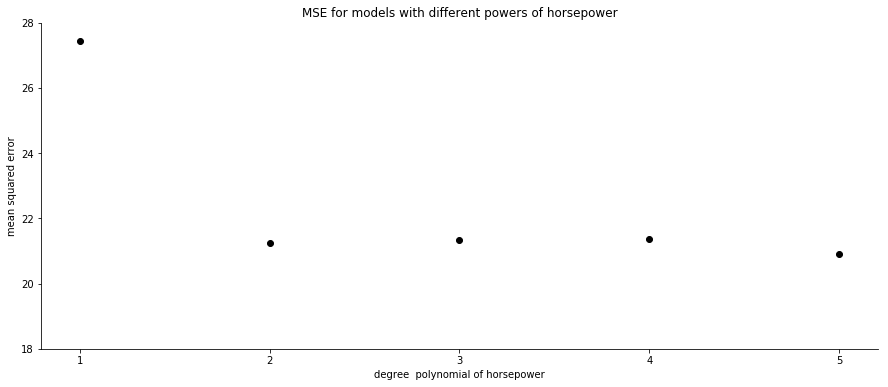

In [92]:
fig, ax = plt.subplots(figsize=(15,6))

ax.scatter([1,2,3,4, 5], test_mse, color='black')
sns.despine(ax=ax)

# Only have ticks on the integers
ax.set_xticks([1,2,3,4,5])

ax.set_title('MSE for models with different powers of horsepower')
ax.set_xlabel('degree  polynomial of horsepower')
ax.set_ylabel('mean squared error')

ax.set_ylim(18,28)